# Import all necessary packages

In [91]:
from collections import Counter
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Set global variaables

In [86]:
OUTPUT_DIR = 'output'

# Load in our transfusion and hemoglobin combined cohort

In [34]:
df_demo = pickle.load(open('tx_hgb_demographics.pkl','rb'))
display(df_demo)

,subject_id,hadm_id,stay_id,icu_intime,admission_age,gender,ethnicity,charttime,amount,hgb_charttime,hemoglobin,blood_units
0,18421337,22413411,30000484,2136-01-14 17:23:32,92,M,OTHER,2136-01-15 10:38:00,9.0,2136-01-15 04:28:00,8.1,0.024658
1,16513856,24463832,30001446,2186-04-12 03:49:00,56,M,WHITE,2186-04-12 04:28:00,375.0,2186-04-12 02:00:00,7.9,1.027397
2,10656173,25778760,30001555,2177-09-27 11:23:13,34,F,WHITE,2177-09-27 16:00:00,350.0,2177-09-27 11:50:00,7.6,0.958904
3,15332791,20683754,30003598,2189-04-14 20:27:25,64,F,WHITE,2189-04-15 21:26:00,275.0,2189-04-15 02:46:00,9.6,0.753425
4,12227720,29396704,30003749,2120-11-05 16:03:00,50,M,WHITE,2120-11-06 22:41:00,350.0,2120-11-06 21:45:00,7.0,0.958904
...,...,...,...,...,...,...,...,...,...,...,...,...
9381,13534199,23907399,39995213,2127-12-11 18:03:43,45,F,UNKNOWN,2127-12-14 04:56:00,350.0,2127-12-14 03:48:00,6.9,0.958904
9382,11539827,21192405,39995735,2124-08-15 10:59:52,62,M,WHITE,2124-08-15 18:33:00,375.0,2124-08-15 18:00:00,11.0,1.027397
9383,11539827,21192405,39995735,2124-08-15 10:59:52,62,M,WHITE,2124-08-15 18:33:00,375.0,2124-08-15 18:00:00,11.0,1.027397
9384,15952397,24449420,39996044,2164-12-10 17:50:47,58,M,WHITE,2164-12-11 11:45:00,46.0,2164-12-11 07:58:00,5.7,0.126027


# Split the dataset by age, gender, and ethnicity

In [22]:
print(np.mean(df_demo['admission_age']))
df_demo_young = df_demo[df_demo['admission_age'] < 65]
# >89 is put to median due to HIPAA
df_demo_old = df_demo[(df_demo['admission_age'] >= 65) & (df_demo['admission_age'] <= 89)]
print(len(df_demo_young.index))
print(len(df_demo_old.index))

display(Counter(df_demo['gender']))
df_demo_male = df_demo[df_demo['gender'] == 'M']
df_demo_female = df_demo[df_demo['gender'] == 'F']

display(Counter(df_demo['ethnicity']))
df_demo_white = df_demo[df_demo['ethnicity'] == 'WHITE']
df_demo_asian = df_demo[df_demo['ethnicity'] == 'ASIAN']
df_demo_black = df_demo[df_demo['ethnicity'] == 'BLACK/AFRICAN AMERICAN']
df_demo_hispanic = df_demo[df_demo['ethnicity'] == 'HISPANIC/LATINO']
df_demo_other = df_demo[df_demo['ethnicity'].isin(['OTHER','AMERICAN INDIAN/ALASKA NATIVE'])]

65.62358832303431
3999
5070


Counter({'M': 5238, 'F': 4148})

Counter({'OTHER': 419,
         'WHITE': 6336,
         'ASIAN': 283,
         'UNKNOWN': 884,
         'UNABLE TO OBTAIN': 146,
         'BLACK/AFRICAN AMERICAN': 927,
         'HISPANIC/LATINO': 372,
         'AMERICAN INDIAN/ALASKA NATIVE': 19})

# Plot the hemoglobin and number of transfusions distribution for each stratification

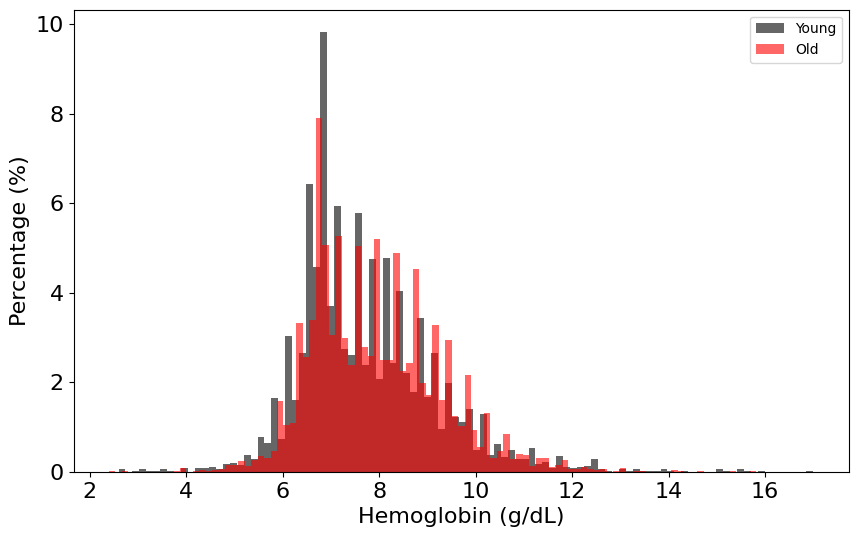

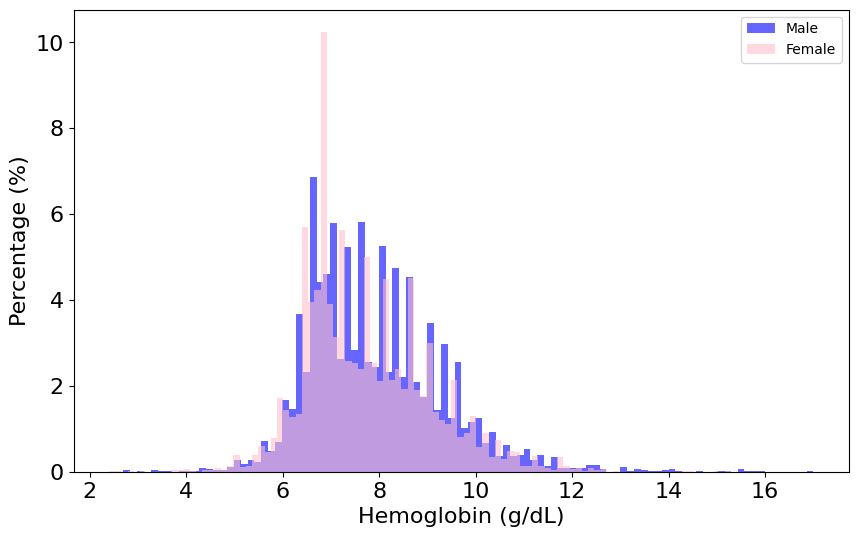

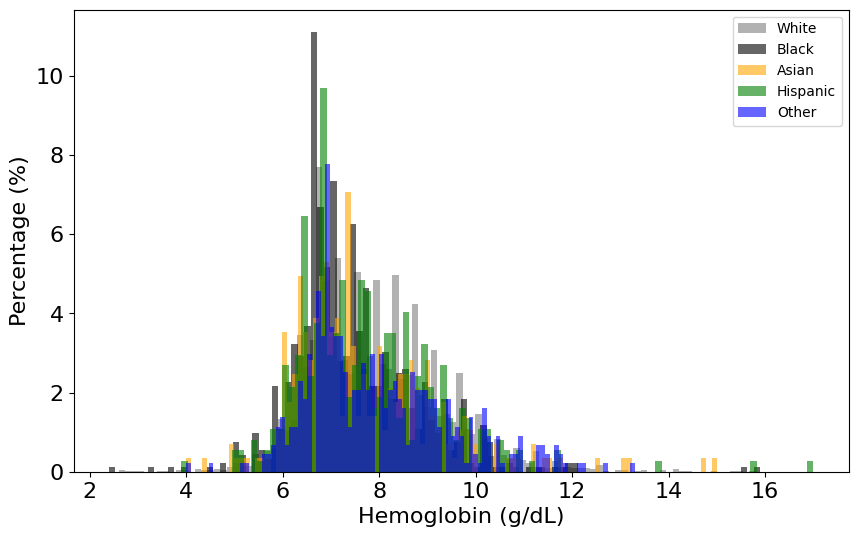

In [87]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.hist(df_demo_young['hemoglobin'], weights=100*np.ones(len(df_demo_young.index))/len(df_demo_young.index), label='Young', bins=100, color='k', alpha=0.6)
plt.hist(df_demo_old['hemoglobin'], weights=100*np.ones(len(df_demo_old.index))/len(df_demo_old.index), label='Old', bins=100, color='r', alpha=0.6)
plt.legend()
plt.xlabel('Hemoglobin (g/dL)', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.savefig(os.path.join(OUTPUT_DIR, 'Hb-distribution_age'))
plt.show()

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.hist(df_demo_male['hemoglobin'], weights=100*np.ones(len(df_demo_male.index))/len(df_demo_male.index), label='Male', bins=100, color='b', alpha=0.6)
plt.hist(df_demo_female['hemoglobin'], weights=100*np.ones(len(df_demo_female.index))/len(df_demo_female.index), label='Female', bins=100, color='pink', alpha=0.6)
plt.legend()
plt.xlabel('Hemoglobin (g/dL)', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.savefig(os.path.join(OUTPUT_DIR, 'Hb-distribution_gender'))
plt.show()

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.hist(df_demo_white['hemoglobin'], weights=100*np.ones(len(df_demo_white.index))/len(df_demo_white.index), label='White', bins=100, color='grey', alpha=0.6)
plt.hist(df_demo_black['hemoglobin'], weights=100*np.ones(len(df_demo_black.index))/len(df_demo_black.index), label='Black', bins=100, color='k', alpha=0.6)
plt.hist(df_demo_asian['hemoglobin'], weights=100*np.ones(len(df_demo_asian.index))/len(df_demo_asian.index), label='Asian', bins=100, color='orange', alpha=0.6)
plt.hist(df_demo_hispanic['hemoglobin'], weights=100*np.ones(len(df_demo_hispanic.index))/len(df_demo_hispanic.index), label='Hispanic', bins=100, color='g', alpha=0.6)
plt.hist(df_demo_other['hemoglobin'], weights=100*np.ones(len(df_demo_other.index))/len(df_demo_other.index), label='Other', bins=100, color='b', alpha=0.6)
plt.legend()
plt.xlabel('Hemoglobin (g/dL)', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.savefig(os.path.join(OUTPUT_DIR, 'Hb-distribution_ethnicity'))
plt.show()

# Get the amount of each number of transfusions per patient

In [50]:
Counter(sorted(dict(Counter(df_demo['subject_id'])).values()))

Counter({1: 7033, 2: 783, 3: 147, 4: 58, 5: 13, 6: 7, 7: 1})

# Plot the hemoglobin disribution between all patients with 1 and >1 transfusion

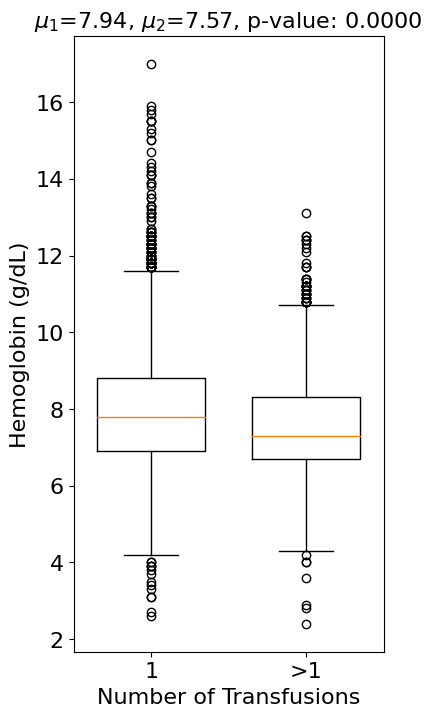

In [93]:
transfusion_counts = dict(Counter(df_demo['subject_id']))
counts_one = [id for id,c in transfusion_counts.items() if c==1]
counts_one_plus = [id for id,c in transfusion_counts.items() if c>1]

hgb_one = np.array(df_demo[df_demo['subject_id'].isin(counts_one)]['hemoglobin'])
hgb_one_plus = np.array(df_demo[df_demo['subject_id'].isin(counts_one_plus)]['hemoglobin'])

plt.figure(figsize=(4,8))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.boxplot([hgb_one, hgb_one_plus], positions=[1,2], widths=[0.7,0.7])
ax.set_xticklabels(['1', '>1'], fontsize=16)

_,p_value = stats.ttest_ind(hgb_one, hgb_one_plus, equal_var=False)
plt.title(rf'$\mu_1$={np.mean(hgb_one):.2f}, $\mu_2$={np.mean(hgb_one_plus):.2f}, p-value: {p_value:.4f}', fontsize=16)
plt.xlabel('Number of Transfusions', fontsize=16)
plt.ylabel('Hemoglobin (g/dL)', fontsize=16)
plt.savefig(os.path.join(OUTPUT_DIR, 'mean_Hb-transfusions'))

plt.show()

# Bin the patients by hemoglobin and get how much of the cohort each represents

KeyError: 'M'

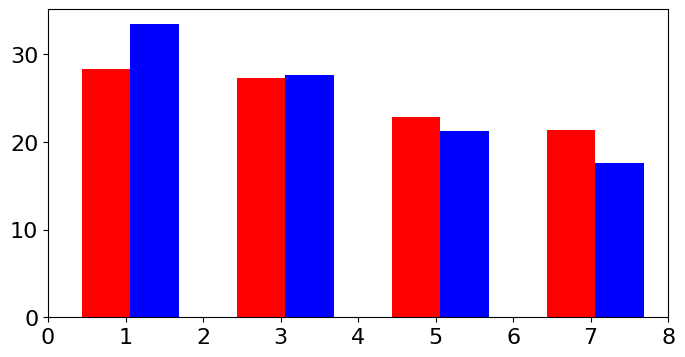

In [94]:
# Gender
all_dfs = [df_demo_male, df_demo_female]
all_dfs_labels = ['Male', 'Female']
colors = ['r', 'b']

plt.figure(figsize=(8,4))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)

for i,df in enumerate(all_dfs):
    hemoglobin = np.array(df['hemoglobin'])
    hemoglobin_counts = np.array([
        len([h for h in hemoglobin if h<7]),
        len([h for h in hemoglobin if h>=7 and h<8]),
        len([h for h in hemoglobin if h>=8 and h<9]),
        len([h for h in hemoglobin if h>=9])
    ])
    hemoglobin_counts = 100 * hemoglobin_counts / np.sum(hemoglobin_counts)

    offset = -0.25 + 1.25/len(all_dfs)*i
    plt.bar([1+offset,3+offset,5+offset,7+offset], hemoglobin_counts, color=colors[i], label=all_dfs_labels[i], width=1.25/len(all_dfs))
    plt.xlim([0,8])

ax.set_xticks([1,3,5,7])
ax.set_xticklabels(['<7.0', '7.0-7.9', '8.0-8.9', '>9.0'], fontsize=12)
plt.xlabel('Hemoglobin (g/dL)', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, 'percent_gender'))
plt.show()


# Age
all_dfs = [df_demo_young, df_demo_old]
all_dfs_labels = ['Young', 'Old']
colors = ['b', 'r']

plt.figure(figsize=(8,4))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)

for i,df in enumerate(all_dfs):
    hemoglobin = np.array(df['hemoglobin'])
    hemoglobin_counts = np.array([
        len([h for h in hemoglobin if h<7]),
        len([h for h in hemoglobin if h>=7 and h<8]),
        len([h for h in hemoglobin if h>=8 and h<9]),
        len([h for h in hemoglobin if h>=9])
    ])
    hemoglobin_counts = 100 * hemoglobin_counts / np.sum(hemoglobin_counts)

    offset = -0.25 + 1.25/len(all_dfs)*i
    plt.bar([1+offset,3+offset,5+offset,7+offset], hemoglobin_counts, color=colors[i], label=all_dfs_labels[i], width=1.25/len(all_dfs))
    plt.xlim([0,8])

ax.set_xticks([1,3,5,7])
ax.set_xticklabels(['<7.0', '7.0-7.9', '8.0-8.9', '>9.0'], fontsize=12)
plt.xlabel('Hemoglobin (g/dL)', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, 'percent_age'))
plt.show()


# Ethnicity
all_dfs = [df_demo_white, df_demo_black, df_demo_asian, df_demo_hispanic, df_demo_other]
all_dfs_labels = ['White', 'Black', 'Asian', 'Hispanic', 'Other']
colors = ['grey', 'k', 'orange', 'g', 'b']

plt.figure(figsize=(8,4))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)

for i,df in enumerate(all_dfs):
    hemoglobin = np.array(df['hemoglobin'])
    hemoglobin_counts = np.array([
        len([h for h in hemoglobin if h<7]),
        len([h for h in hemoglobin if h>=7 and h<8]),
        len([h for h in hemoglobin if h>=8 and h<9]),
        len([h for h in hemoglobin if h>=9])
    ])
    hemoglobin_counts = 100 * hemoglobin_counts / np.sum(hemoglobin_counts)

    offset = -1.25/len(all_dfs)-0.25 + 1.25/len(all_dfs)*i
    plt.bar([1+offset,3+offset,5+offset,7+offset], hemoglobin_counts, color=colors[i], label=all_dfs_labels[i], width=1.25/len(all_dfs))
    plt.xlim([0,8.25])

ax.set_xticks([1,3,5,7])
ax.set_xticklabels(['<7.0', '7.0-7.9', '8.0-8.9', '>9.0'], fontsize=12)
plt.xlabel('Hemoglobin (g/dL)', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, 'percent_ethnicity'))
plt.show()